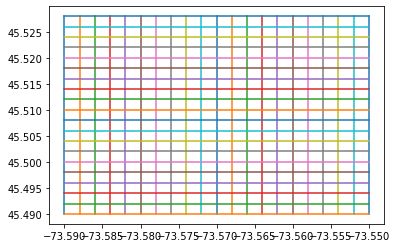

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from statistics import mean
fig = plt.figure()
ax = plt.axes()
xs = np.arange(-73.59, -73.55, 0.002)
#print(xs)
ys = np.arange(45.49, 45.53, 0.002)
#print(ys)
lat, lon = np.meshgrid(xs,ys)
#print(lat)
#print(lon)
for x in xs:
    plt.plot([x, x], [ys[0], ys[-1]])
for y in ys:
    plt.plot([xs[0], xs[-1]], [y, y])
plt.show()

In [24]:
data = gpd.read_file("C:/Users/Dora/Documents/COMP 6721/Project1/Materials/Shape/crime_dt.shp")

48.665789473684214
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 21, 21, 21, 21, 21, 21, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 32, 32, 32, 33, 34, 35, 35, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 42, 42, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 48, 49, 50, 50, 51, 52, 52, 52, 53, 53, 53, 54, 55, 55, 55, 55, 56, 56, 56, 56, 57, 57, 57, 58, 58, 59, 59, 59, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63, 64, 64, 65, 6

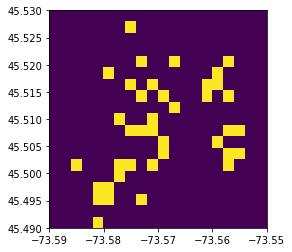

In [57]:
# Convert geometry to numpy array

geomPointList=[]

for point in data["geometry"]:
    geomPointList.append([point.x, point.y])
npArray = np.array(geomPointList)
#print(geomPointList)
pointlength = len(geomPointList)
row = len(xs)-1
col = len(ys)-1
#print(row)
#print(col)
#creating a matrix according to grid cells
Matrix = [[0 for x in range(row)] for y in range(col)]

#counting the number of crime data for each cell of the grid
row = 0;
for i in range(len(ys)-1, 0, -1):
    col = 0;
    ymax = ys[i]
    ymin = ys[i-1]
    for j in range(1,len(xs)):
        xmax = xs[j]
        xmin = xs[j-1]
        #print(ymax, ymin, xmax, xmin)
        count = 0;
        for point in geomPointList:
             if point[0] > xmin and point[0] < xmax and point[1] > ymin and point[1] < ymax:
                    count+=1;
        #print(row,col)
        Matrix[row][col] = count
        #print(col)
        col +=1
   # print("row =", row)
    row +=1
#print(Matrix)

#creating a one dimensional array from Matrix to calculate mean crime
tArray = []

for i in range(0,19):
    for j in range(0,20):
        tArray.append(Matrix[i][j])
#print(tArray)
#print(len(tArray))
print(mean(tArray))
sortedArray = tArray
sortedArray.sort()
print(sortedArray)
threshold = 90
index = len(sortedArray) * (threshold/100)
pos = int(index)
print(sortedArray[pos])

for i in range(0,19):
    for j in range(0,20):
        if Matrix[i][j] >= sortedArray[pos]:
            Matrix[i][j] = 100
        else:
            Matrix[i][j] = -1
fig = plt.figure()
ax = plt.axes()
ax.imshow(Matrix, extent=[-73.59, -73.55, 45.49, 45.53])
plt.show()